# Ricorsione

La *ricorsione* è un meccanismo di calcolo che consiste nel risolvere un problema risolvendo dei sottoproblemi simili a quello originale ma più semplici. Si configura generalmente come una alternativa alla *iterazione* (cicli). Tipicamente la ricorsione prende la forma di *funzioni ricorsive*, ovvero funzioni che richiamano se stesse, con parametri più semplici di quelli della chiamata originale.

Consideriamo una funzione che visualizza un triangolo rettangolo formato da asterischi, come abbiamo già visto in passato.

In [28]:
def triangolo_iterativo(n):
    """
    Disegna un triangolo rettangolo formato da `n` righe.
    """
    for i in range(1, n+1):
        print("*" * i)

In [29]:
triangolo_iterativo(5)

*
**
***
****
*****


Notare che questo triangolo è formato da uno composto da 4 righe (come sarebbe l'outpit di `triangolo_iterativo(4)`) più una riga finale di 5 asterischi. In generale, un triangolo di `n` righe si può pensare come composto da uno di `n-1` righe con l'aggiunta finale di una riga di `n` asterischi.

Questa è l'idea che da origine alla soluzione ricorsiva.

In [31]:
def triangolo_ricorsivo(n):
    if n == 1: # caso base
        print("*")
    else:      # caso ricorsivo
        triangolo_ricorsivo(n-1)
        print("*" * n)

In [30]:
triangolo_ricorsivo(5)

*
**
***
****
*****


Quando la funzione `triangolo_ricorsivo(5)` viene chiamata, essa causerà in cascata la chiamata di `triangolo_ricorsivo(4)` quindi di `triangolo ricorsivo(3)`, `triangolo ricorsivo(2)` e così via. Perché questa catena di chiamate si arresti, è necessario prevedere un *caso base* (in questo caso qundo n=1) che viene risolto direttamente, senza causare una ulteriore chiamata di funzione.

Vediamo più in dettaglio le tracce di esecuzione di `triangolo_ricorsivo(1)`, `triangolo_ricorsivo(2)` e `triangolo_ricorsivo(3)`. Notare che queste tracce di esecuzione sono semplificate: quando avviene una chiamata di funzione durante l'esecuzione, non tracciamo passo-passo anche quest'ultima, ma ne consideriamo direttamEnte il risultato (in questo caso l'output) che conosciamo già dagli esempi già calcolati.

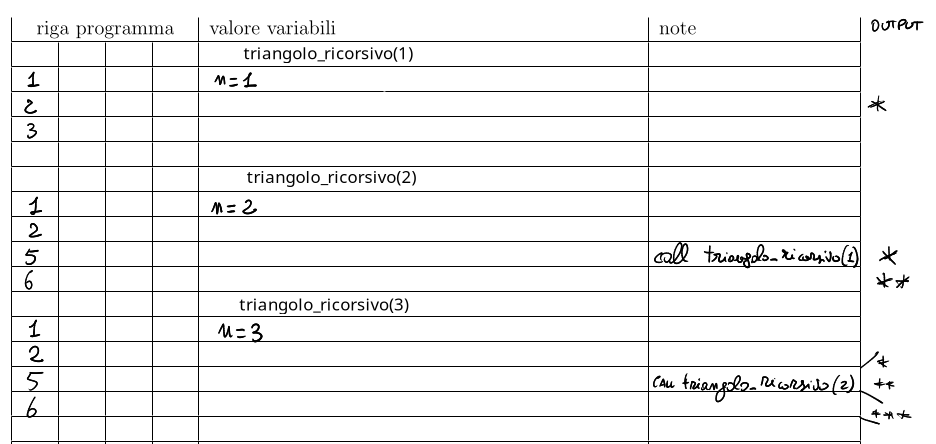

Vediamo invece qui sotto l'esecuzione passo passo di `triangolo_ricorsivo(3)` in tutti i dettagli, compresa l'esecuzione delle chiamate ricorsive (si chiamano in questo modo le chiamate di una funzione a se stessa).

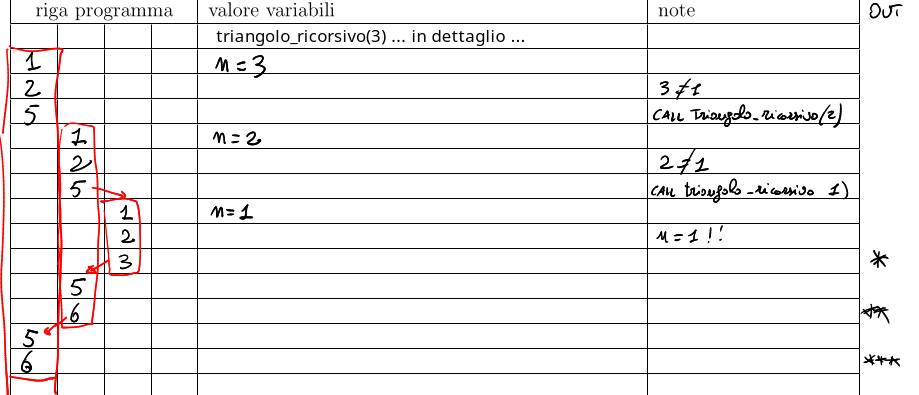

## Funzioni ricorsive che restituiscono un risultato

Consideriamo adesso la funzione `somma_iterativa` che prende in input un numero `n` e restituisce la somma dei numeri da 1 fino  ad `n`. Anche questa l'abbiamo vista più volte nelle lezioni passate.

In [32]:
def somma_iterativa(n):
    """
    Restituisce la somma 1 + 2 + 3 + ... + n
    """
    sum = 0
    for i in range(1, n+1):
        sum += i
    return sum

In [33]:
somma_iterativa(5)

15

Come nel caso precedente, possiamo notare che per calcolare la somma dei numeri da 1 fino ad n, possiamo prima calcolare la somma dei numeri da 1 fino ad `n-1`, e poi aggiungere `n`. Questa idea si tramuta nella seguente funzione:

In [35]:
def somma_ricorsiva(n):
    if n == 1:  # caso base
        return 1
    else:       # caso ricorsivo
        x = somma_ricorsiva(n-1)
        return x + n
        # Si potrebbe anche scrivere semplicemente return somma_ricorsiva(n-1) + n
        # senza usare la variabile x. L'unico motivo per cui uso la variabile x
        # è che è più semplice dopo fare vedere i dettagli dell'esecuzione passo-passo.

In [36]:
somma_ricorsiva(5)

15

Come per il precedente programma, vediamo l'esecuzione passo-passo (ma sorvolando sulle chiamate ricorsive) per `somma_ricorsiva(1)`, `somma_ricorsiva(2)` e `somma_ricorsiva(3)`.

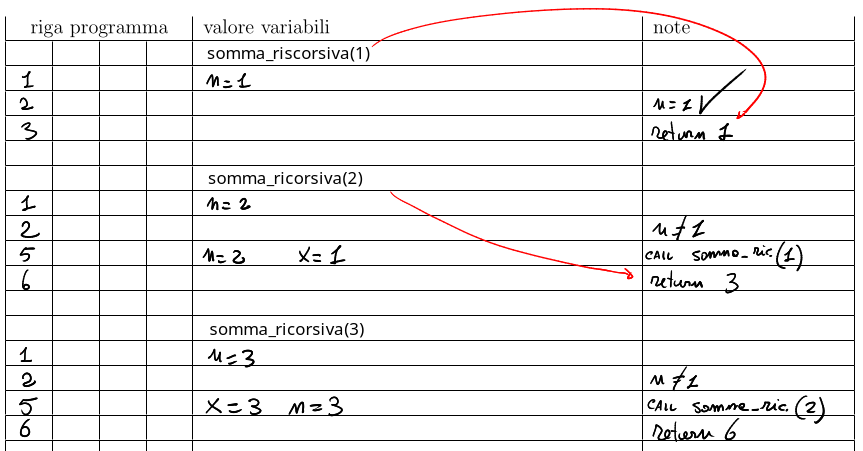

E poi aggiungiamo l'esecuzione passo-passo dettagliata con tutte le chiamate ricorsivo per `somma_ricorsiva(3)`.

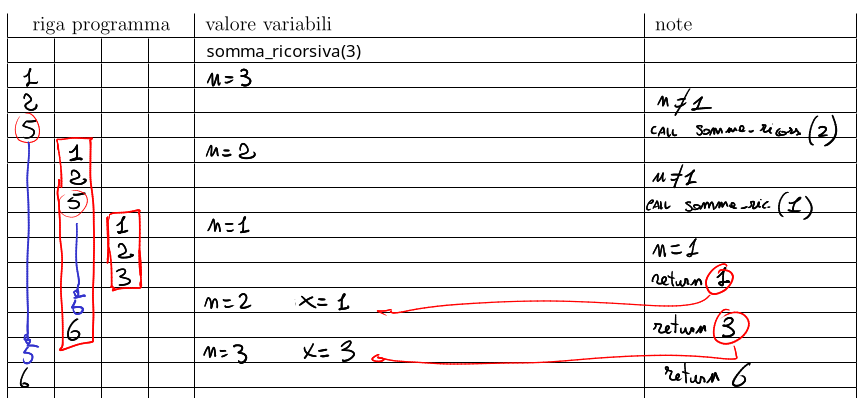

Notare che Python non è un linguaggio particolarmente ottimizzato per le funzioni ricorsive. Le funzioni ricorsive, se non ottimizzate corettamente, cosa che richiedono il lavoro congiunto del compilatore e di chi scrive il codice, sono molto più dispendiose di quelle iterative. Per questo motivo, Python ha un limite massimo al numero di chiamate ricorsive che è possibile effettuare, di default pari a 1000 o 3000. Se si supera questo limite, viene restituito un errore.

In [46]:
somma_ricorsiva(500)

125250

In [47]:
somma_ricorsiva(4000)

RecursionError: maximum recursion depth exceeded

## Ricorsione e altri tipi di dato

Non siamo limitati a usare la ricorsione su funzioni i cui argomenti sono interi. Qualunque tipo di dato si può usare ai fini della ricorsione, purché ci sia un modo di misurare la complessità degli oggetti di questo tipo. Il caso ricorsivo dovrò richiamare la funzione su valori più semplici rispetto all'argomento in input. Per gli interi la misura di complessità è il numero stesso, e infatti le funzioni ricorsive viste finora richiamavano se stesse su un input ridotto di 1. Per le stringhe, invece, una buona misura della complessità è la lunghezza.

Vediamo come definire una funzione ricorsiva sulle stringhe che ci dice quando una stringa è palindroma (si può leggere indifferentemente da destra a sinistra o da sinistra a destra).

Il caso base in questo problema sono le stringhe molto corte, quelle di un carattere o meno. Queste sono sicuramente palindrome. Per il caso ricorsivo, possiamo controllare il primo e ultimo carattere: se sono diversi, sicuramente la stringa non può essere palindroma, ma se sono uguali, allora possiamo:
  1. togliere questi caratteri dalla stringa
  2. determinare la nuova stringa ottenuta (che è più corta di quella di partenza) è palindroma
  3. la stringa originale è palindroma se e solo se questa ridotta lo è

Questa idea si implementa nella seguente funzione.

In [49]:
def palindroma(s):
    """
    Restituisce True se s è palindroma, False altrimenti
    """
    if len(s) <= 1:      # caso base
        return True
    elif s[0] != s[-1]:
        return False
    else:
        return palindroma(s[1:len(s)-1])

Si noti l'uso di `s[1:len(s)-1]` per estrarre la sottostringa di `s` che inizia alla posizione 1 e termina alla posizione `len(s)-2`, ovvero quella ottenuta eliminando il primo e l'ultimo elemento.

In [50]:
palindroma("anna")

True

In [51]:
palindroma("ala")

True

In [52]:
palindroma("alce")

False

Qui sotto vediamo l'esecuzione passo passo della chiamata `palindroma("asta")`.

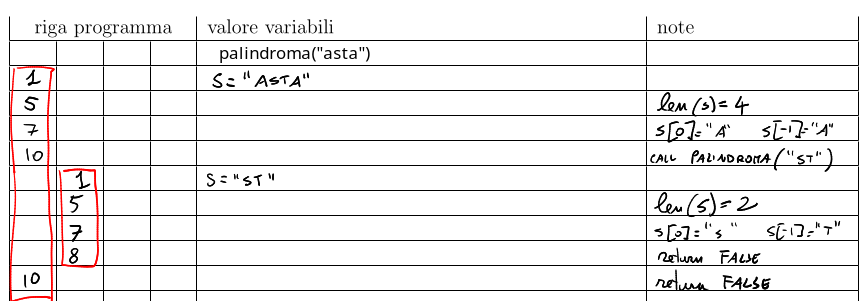

Si noti che con l'input `asta` non arriviamo al caso base, ma ci fermiamo quando confrontiamo `s` con `t`. In generale, nella funzione `palindroma` il caso base si raggiunge solo se effettivamente la stringa in input è palindroma, altrimenti ci si ferma prima.